### Importing the required Library

In [38]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt


### Loading the dataset to pandas DataFrame 

In [2]:
Fraud_data = pd.read_csv(r"C:\Users\utkar\Desktop\Accredian\Fraud.csv")

In [3]:
# first 5 rows and column
Fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Information of the dataset 
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#calculating the statistical measures about data
Fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Handle Missing Values

In [6]:
# checking the null values
Fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# finding the number of row and columns in the dataset
Fraud_data.shape

(6362620, 11)

In [8]:
# checking for number of fraud  0 as not fraud and 1 as fraud 
Fraud_data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
# unbalanced data as Percentage of Legit transactions and Percentage of Fraud transactions
legit = len(Fraud_data[Fraud_data.isFraud == 0])
fraud = len(Fraud_data[Fraud_data.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("No. of Legit transactions: ", legit)
print("No. of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.2f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.2f} %".format(fraud_percent))

No. of Legit transactions:  6354407
No. of Fraud transactions:  8213
Percentage of Legit transactions: 99.87 %
Percentage of Fraud transactions: 0.13 %


In [10]:
# Note that there is not information for customers that start with M (Merchants).
Merchant = Fraud_data[Fraud_data['nameDest'].str.contains('M')]
Merchant.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [11]:
Merchant.shape

(2151495, 11)

In [12]:
# list of columns
Fraud_data.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

### LABEL ENCODING

In [13]:
def label_encode_nameDest(nameDest):
    if nameDest.startswith('M'):
        return 0
    elif nameDest.startswith('C'):
        return 1
    else:
        return None  # Handle other cases if necessary

Fraud_data['nameDest_encoded'] = Fraud_data['nameDest'].apply(label_encode_nameDest)

# Display the updated DataFrame
print(Fraud_data[['nameDest', 'nameDest_encoded']])

            nameDest  nameDest_encoded
0        M1979787155                 0
1        M2044282225                 0
2         C553264065                 1
3          C38997010                 1
4        M1230701703                 0
...              ...               ...
6362615   C776919290                 1
6362616  C1881841831                 1
6362617  C1365125890                 1
6362618  C2080388513                 1
6362619   C873221189                 1

[6362620 rows x 2 columns]


In [14]:
# object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Fraud_data['Transation_type_code'] = le.fit_transform(Fraud_data['type'])

In [15]:
Fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_encoded,Transation_type_code
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,3


## Data Visulization

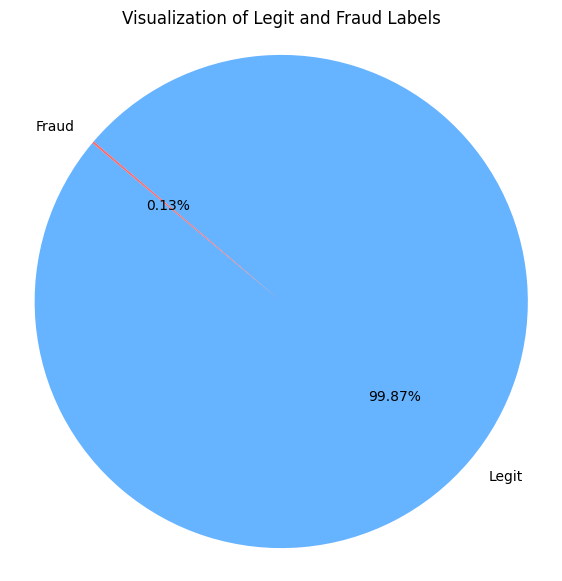

In [16]:
# Number of legit and fraud transactions
plt.figure(figsize=(7, 7))
labels = ["Legit", "Fraud"]
count_classes = Fraud_data['isFraud'].value_counts(sort=True)

# Plot a pie chart
plt.pie(count_classes, labels=labels, autopct='%1.2f%%', startangle=140, colors=['#66b3ff', '#ff6666'])
plt.title("Visualization of Legit and Fraud Labels")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Multicollinearity

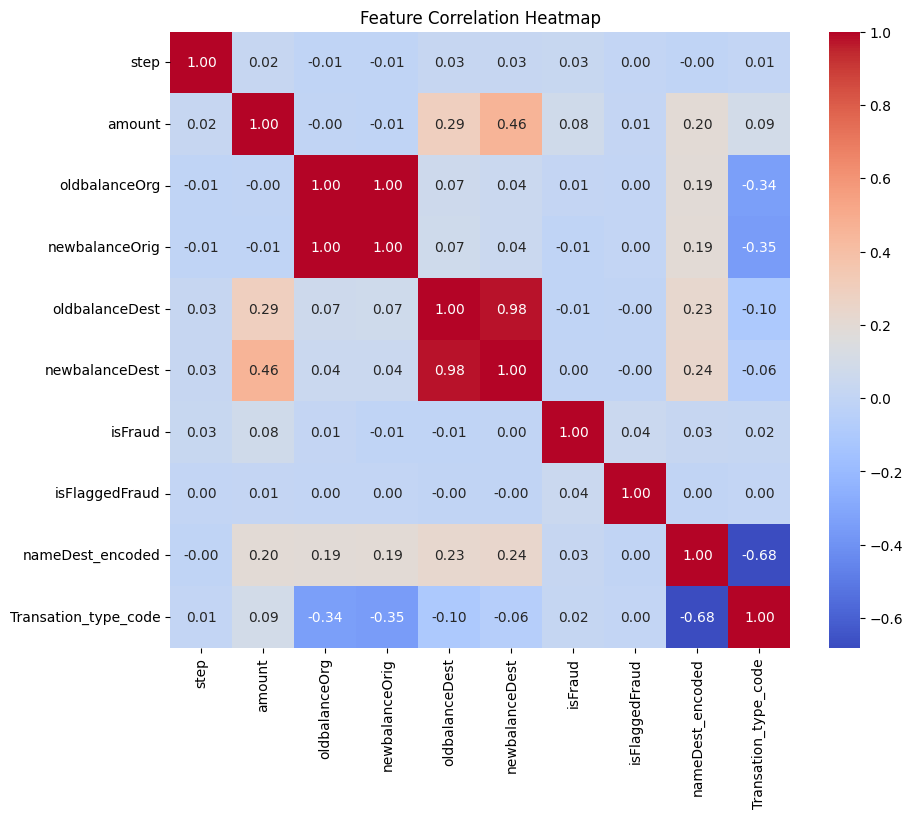

In [17]:
# Drop columns if they exist
Fraud_data = Fraud_data.drop(columns=['type', 'nameOrig', 'nameDest'], errors='ignore')

# Calculate the correlation matrix
corr = Fraud_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


### Outliers

In [18]:
# Function to remove outliers using IQR
def remove_outliers(Fraud_data, column):
    Q1 = Fraud_data[column].quantile(0.25)
    Q3 = Fraud_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Fraud_data[(Fraud_data[column] >= lower_bound) & (Fraud_data[column] <= upper_bound)]

# Remove outliers from specific columns
for column in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    Fraud_data = remove_outliers(Fraud_data, column)

In [19]:
x = Fraud_data.drop(columns = 'isFraud', axis = 1)
y = Fraud_data['isFraud']

In [20]:
x.head() # first 5 rows

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_encoded,Transation_type_code
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3
2,1,181.00,181.0,0.00,0.0,0.0,0,1,4
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3
5,1,7817.71,53860.0,46042.29,0.0,0.0,0,0,3


In [21]:
y.tail()  # last 5 rows

6362605    1
6362608    1
6362609    1
6362610    1
6362611    1
Name: isFraud, dtype: int64

In [22]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [23]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=22)
random_forest.fit(x_train, y_train)
y_pred_random_forest = random_forest.predict(x_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest Accuracy: 0.9996109380238112
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    649687
           1       0.97      0.59      0.74       595

    accuracy                           1.00    650282
   macro avg       0.98      0.80      0.87    650282
weighted avg       1.00      1.00      1.00    650282



In [24]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=22)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_decision_tree))

Decision Tree Accuracy: 0.999604786846322
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    649687
           1       0.80      0.75      0.78       595

    accuracy                           1.00    650282
   macro avg       0.90      0.88      0.89    650282
weighted avg       1.00      1.00      1.00    650282



In [26]:
# Print scores of our classifiers
print("Random Forest Classifier Score: ", random_forest_accuracy*100)
print("Decision Tree Score: ", decision_tree_accuracy*100)

Random Forest Classifier Score:  99.96109380238111
Decision Tree Score:  99.9604786846322


In [39]:
# Decision Tree Evaluation
y_pred_decision_tree = decision_tree.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_decision_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("Decision Tree AUC-ROC:", roc_auc_score(y_test, decision_tree.predict_proba(x_test)[:, 1]))

# Random Forest Evaluation
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, random_forest.predict_proba(x_test)[:, 1]))


Decision Tree Accuracy: 0.999604786846322
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    649687
           1       0.80      0.75      0.78       595

    accuracy                           1.00    650282
   macro avg       0.90      0.88      0.89    650282
weighted avg       1.00      1.00      1.00    650282

Decision Tree Confusion Matrix:
 [[649578    109]
 [   148    447]]
Decision Tree AUC-ROC: 0.8755463655523946
Random Forest Accuracy: 0.9996109380238112
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    649687
           1       0.97      0.59      0.74       595

    accuracy                           1.00    650282
   macro avg       0.98      0.80      0.87    650282
weighted avg       1.00      1.00      1.00    650282

Random Forest Confusion Matrix:
 [[649675     12]
 [   241    354]]
Random 

### Feature Importance

In [42]:
importances = random_forest.feature_importances_
features = ['step', 'type_encoded', 'amount', 'nameDest_encoded', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']

feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print(feature_importance)


            feature  importance
5    newbalanceOrig    0.373320
2            amount    0.160300
1      type_encoded    0.155241
0              step    0.120342
4     oldbalanceOrg    0.105538
8    isFlaggedFraud    0.057111
3  nameDest_encoded    0.025923
7    newbalanceDest    0.002226
6    oldbalanceDest    0.000000


### Model Prediction

In [27]:
# Function to take user input and convert it into the correct format
def get_user_input():
    step = int(input("Enter the step: "))
    Transation_type_code = int(input("Enter the type (encoded): "))
    amount = float(input("Enter the amount: "))
    nameDest_encoded = int(input("Enter the nameDest (encoded): "))
    oldbalanceOrg = float(input("Enter the oldbalanceOrg: "))
    newbalanceOrig = float(input("Enter the newbalanceOrig: "))
    oldbalanceDest = float(input("Enter the oldbalanceDest: "))
    newbalanceDest = float(input("Enter the newbalanceDest: "))
    isFlaggedFraud = int(input("Enter if the transaction is flagged as fraud (0 or 1): "))
    
    # Create a numpy array with the inputs
    user_data = np.array([step, Transation_type_code, amount, nameDest_encoded, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFlaggedFraud]).reshape(1, -1)
    return user_data


In [28]:
# Predicting function
def predict_fraud(model, user_data):
    prediction = model.predict(user_data)
    return prediction[0]

In [33]:
# Taking user input
user_data = get_user_input()

Enter the step:  1
Enter the type (encoded):  3
Enter the amount:  9839.64
Enter the nameDest (encoded):  0
Enter the oldbalanceOrg:  170136
Enter the newbalanceOrig:  160296.36
Enter the oldbalanceDest:  0
Enter the newbalanceDest:  0
Enter if the transaction is flagged as fraud (0 or 1):  0


In [34]:
# Random Forest Prediction
random_forest_prediction = predict_fraud(random_forest, user_data)
print("Random Forest Prediction (1 = Fraud, 0 = Not Fraud):", random_forest_prediction)

Random Forest Prediction (1 = Fraud, 0 = Not Fraud): 0


C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
# Decision Tree Prediction
decision_tree_prediction = predict_fraud(decision_tree, user_data)
print("Decision Tree Prediction (1 = Fraud, 0 = Not Fraud):", decision_tree_prediction)

Decision Tree Prediction (1 = Fraud, 0 = Not Fraud): 0


C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Describe Your Fraud Detection Model in Elaboration
We will use two different models to predict fraudulent transactions: Decision Tree, and Random Forest. These models are chosen because they provide a good mix of interpretability and performance.

### How Did You Select Variables to Be Included in the Model?
The variables were chosen based on their significance to the identification of fraudulent transactions. Characteristics including, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest are significant as they give the financial data of the transactions directly. The transaction type and its destination account are also of great importance because they can show up patterns of fraud.

###  Do These Factors Make Sense? If Yes, How? If Not, How Not?
#### Yes, these factors make sense:

Amount: Large sums of unauthorized transactions can be the ones that are suspected to be the fraud.

Balance Changes: Distinct differences between the current balance and the old balance may raise a concern of the possibility of some unauthorized transactions.

Type of Transaction: Some transfers of funds (debit S/O deposit) are done through an electronic banking system. g. , 'cash_out', 'transfers', also credit transfers can be manipulated by user.

Destination of Transaction: Fraudsters frequently move money to particular accounts, hence, the patterns in the 'nameDest' may be indicative enough between good and bad accounts.

## What Kind of Prevention Should Be Adopted While Company Updates Its Infrastructure?
1. Use multi-factor authentication for transaction verification.
2. Anomaly detection
3. Regular Audits 

### Assuming These Actions Have Been Implemented, How Would You Determine If They Work?
1. By evaluating model performance metrics.
2. Gather feedback from customers in relation to fraudulent activities and their opinion on the newly applied security measures.
3. Compare the rates of detected fraud before and after implementing the measures.